# Prep

## Imports & paths

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
from Functions import *
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
4,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
7,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
8,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
10,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
13,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
15,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN
16,26641,high,0,"[1, 2]","[2, 1]",NaN,"[2, 1]","[1, 2]",NaN,NaN,"[2, 1]",NaN,NaN
19,26770,high,0,"[0, 1]","[1, 3]",NaN,"[2, 3]","[0, 1]",NaN,NaN,NaN,"[1, 3]","[2, 3]"


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data

,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,log_rt,z_rt,rt_zz_low,rt_zz_high,bool_middle_item,chance_performer,inattentives,psych_disorder,head_trauma,pen_paper
0,797.865,0,85.0,learning,297,2422963,0.0-77.0-0.0,high,0.0,0.0,...,6.683192,1.325479,0.067628,0.026900,False,False,False,False,False,False
1,654.720,0,73.0,learning,298,2423619,0.0-77.0-1.0,high,0.0,0.0,...,6.485734,1.001916,0.067628,0.026900,True,False,False,False,False,False
2,1317.900,0,79.0,learning,299,2424938,0.0-77.0-2.0,high,0.0,0.0,...,7.184553,2.147032,0.067628,0.026900,False,False,False,False,False,False
3,276.305,0,80.0,learning,300,2425216,0.0-77.0-3.0,high,0.0,0.0,...,5.625118,-0.408328,0.067628,0.026900,False,False,False,False,False,False
4,823.310,0,85.0,learning,302,2426546,0.0-78.0-0.0,high,0.0,1.0,...,6.714547,1.376858,0.062608,0.020196,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237268,193.665,0,80.0,transfer,5315,1992663,0.0-1118.0-3.0,low,7.0,23.0,...,5.271280,0.013623,-0.011577,0.017257,True,False,False,False,False,False
237269,134.030,0,80.0,transfer,5317,1993311,0.0-1119.0-0.0,low,7.0,24.0,...,4.905497,-0.362680,-0.012686,-0.004579,False,False,False,False,False,False
237270,101.775,0,85.0,transfer,5318,1993420,0.0-1119.0-1.0,low,7.0,24.0,...,4.632542,-0.643485,-0.012686,-0.004579,True,False,False,False,False,False
237271,93.150,0,73.0,transfer,5319,1993520,0.0-1119.0-2.0,low,7.0,24.0,...,4.544889,-0.733659,-0.012686,-0.004579,False,False,False,False,False,False


## Get all_data_w (spread 4 subtrials out into wide format)

In [72]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'trial']
all_data['subtrial'] = all_data['subtrial'].astype(int)
all_data_w = all_data[id_cols + ['subtrial', 'rt']].pivot_table(index=id_cols, columns=['subtrial'], values=['rt']).reset_index()
all_data_w.columns = [''.join([str(e) for e in f]) for f in all_data_w.columns.values]
all_data_w

,sid,trial_type,phase,block,trial,rt0,rt1,rt2,rt3
0,13885,learning,high,0.0,0.0,797.865,654.720,1317.900,276.305
1,13885,learning,high,0.0,1.0,823.310,239.845,389.015,298.555
2,13885,learning,high,0.0,2.0,42.995,344.920,446.100,284.535
3,13885,learning,high,0.0,3.0,510.510,485.415,392.410,273.690
4,13885,learning,high,0.0,4.0,217.365,215.930,477.475,279.585
...,...,...,...,...,...,...,...,...,...
46564,39520,transfer,low,7.0,20.0,107.545,73.220,93.360,169.035
46565,39520,transfer,low,7.0,21.0,138.995,103.500,97.605,136.205
46566,39520,transfer,low,7.0,22.0,88.085,93.460,128.775,172.820
46567,39520,transfer,low,7.0,23.0,112.200,68.285,94.840,193.665


In [73]:
# id_cols = ['sid', 'trial_type', 'phase', 'block', 'trial']
# all_data['subtrial'] = all_data['subtrial'].astype(int)
# all_data_w = all_data[id_cols + ['subtrial', 'middle_item']].pivot_table(index=id_cols, columns=['subtrial'], values=['middle_item']).reset_index()
# all_data_w.columns = [''.join([str(e) for e in f]) for f in all_data_w.columns.values]
# all_data_w

In [78]:
all_data_w = pd.merge(
    all_data.loc[(all_data['subtrial'] == 3), ['sid', 'trial_type', 'phase', 'block', 'trial', 'trial_', 'star_iteration', 'acc', 'goal_star', 'unlocked_star', 'n_unique_items']],
    all_data_w, on=id_cols
)
all_data_w

,sid,trial_type,phase,block,trial,trial_,star_iteration,acc,goal_star,unlocked_star,n_unique_items,rt0,rt1,rt2,rt3
0,13885,learning,high,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,3.0,797.865,654.720,1317.900,276.305
1,13885,learning,high,0.0,1.0,1.0,0.0,0.0,3.0,-1.0,3.0,823.310,239.845,389.015,298.555
2,13885,learning,high,0.0,2.0,2.0,0.0,0.0,3.0,-1.0,3.0,42.995,344.920,446.100,284.535
3,13885,learning,high,0.0,3.0,3.0,0.0,0.0,3.0,-1.0,3.0,510.510,485.415,392.410,273.690
4,13885,learning,high,0.0,4.0,4.0,0.0,0.0,3.0,-1.0,3.0,217.365,215.930,477.475,279.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46471,39520,transfer,low,7.0,20.0,195.0,2.0,1.0,2.0,2.0,3.0,107.545,73.220,93.360,169.035
46472,39520,transfer,low,7.0,21.0,196.0,2.0,1.0,2.0,2.0,3.0,138.995,103.500,97.605,136.205
46473,39520,transfer,low,7.0,22.0,197.0,2.0,1.0,2.0,2.0,3.0,88.085,93.460,128.775,172.820
46474,39520,transfer,low,7.0,23.0,198.0,2.0,1.0,2.0,2.0,3.0,112.200,68.285,94.840,193.665


In [79]:
all_data_w['total_rt'] = np.sum(all_data_w[['rt0', 'rt1', 'rt2', 'rt3']], axis=1)

for subtrial in range(4):
    all_data_w['rel_rt{}'.format(subtrial)] = all_data_w['rt{}'.format(subtrial)] / all_data_w['total_rt']

# zigzag
all_data_w['rt0-rt1+rt2-rt3'] = (all_data_w['rt0'] - all_data_w['rt1'] + all_data_w['rt2'] - all_data_w['rt3']) / all_data_w['total_rt']

# planning
all_data_w['rt0+rt2'] = (all_data_w['rt0'] + all_data_w['rt2']) / all_data_w['total_rt']

# automation item0
all_data_w['rt0-rt1'] = (all_data_w['rt0'] - all_data_w['rt1']) / all_data_w['total_rt']

# automation item1
all_data_w['rt2-rt3'] = (all_data_w['rt2'] - all_data_w['rt3']) / all_data_w['total_rt']

# automation 4-key sequence
all_data_w['rt2-rt0'] = (all_data_w['rt2'] - all_data_w['rt0']) / all_data_w['total_rt']
all_data_w['rt2-rt1'] = (all_data_w['rt2'] - all_data_w['rt1']) / all_data_w['total_rt']

all_data_w

,sid,trial_type,phase,block,trial,trial_,star_iteration,acc,goal_star,unlocked_star,...,rel_rt0,rel_rt1,rel_rt2,rel_rt3,rt0-rt1+rt2-rt3,rt0+rt2,rt0-rt1,rt2-rt3,rt2-rt0,rt2-rt1
0,13885,learning,high,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,...,0.261871,0.214888,0.432554,0.090687,0.388849,0.694424,0.046982,0.341866,0.170683,0.217665
1,13885,learning,high,0.0,1.0,1.0,0.0,0.0,3.0,-1.0,...,0.470268,0.136998,0.222202,0.170532,0.384941,0.692470,0.333271,0.051670,-0.248066,0.085205
2,13885,learning,high,0.0,2.0,2.0,0.0,0.0,3.0,-1.0,...,0.038438,0.308364,0.398820,0.254378,-0.125484,0.437258,-0.269925,0.144441,0.360382,0.090456
3,13885,learning,high,0.0,3.0,3.0,0.0,0.0,3.0,-1.0,...,0.307161,0.292062,0.236104,0.164673,0.086530,0.543265,0.015099,0.071431,-0.071058,-0.055959
4,13885,learning,high,0.0,4.0,4.0,0.0,0.0,3.0,-1.0,...,0.182605,0.181400,0.401120,0.234875,0.167450,0.583725,0.001206,0.166245,0.218515,0.219720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46471,39520,transfer,low,7.0,20.0,195.0,2.0,1.0,2.0,2.0,...,0.242678,0.165222,0.210669,0.381431,-0.093307,0.453346,0.077455,-0.170762,-0.032009,0.045446
46472,39520,transfer,low,7.0,21.0,196.0,2.0,1.0,2.0,2.0,...,0.291819,0.217298,0.204921,0.285962,-0.006519,0.496741,0.074522,-0.081041,-0.086898,-0.012377
46473,39520,transfer,low,7.0,22.0,197.0,2.0,1.0,2.0,2.0,...,0.182318,0.193443,0.266538,0.357702,-0.102289,0.448855,-0.011125,-0.091164,0.084220,0.073095
46474,39520,transfer,low,7.0,23.0,198.0,2.0,1.0,2.0,2.0,...,0.239238,0.145600,0.202222,0.412941,-0.117081,0.441459,0.093637,-0.210719,-0.037016,0.056622


# Results

## RT zigzag pattern

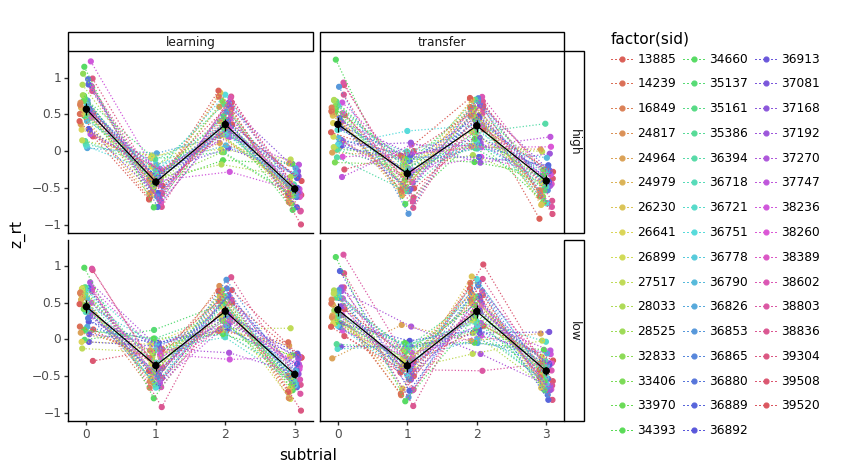

<ggplot: (110994348541)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_zrtOverSubtrialWithIndividuals.png


In [5]:
subj_dat = all_data.groupby(['sid', 'phase', 'trial_type', 'subtrial']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('subtrial', 'z_rt', color='factor(sid)'))
     + gg.geom_point(position=gg.position_dodge(width=0.2))
     + gg.geom_line(linetype='dotted', position=gg.position_dodge(width=0.2))
     + gg.stat_summary(gg.aes(group=1), color='black')
     + gg.stat_summary(gg.aes(group=1), color='black', geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_zrtOverSubtrialWithIndividuals.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtOverSubtrial.png


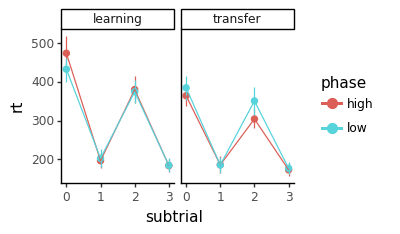

<ggplot: (110874056325)>


In [45]:
subj_dat = all_data.groupby(['sid', 'subtrial', 'trial_type', 'phase']).aggregate('mean').reset_index()
gg.options.figure_size = (3, 2)
g = (gg.ggplot(subj_dat, gg.aes('subtrial', 'rt', color='phase'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid(' ~ trial_type')
    )
g.save(os.path.join(plot_dir, '101_RtOverSubtrial.png'))
print(g)

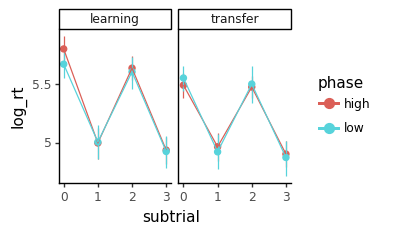

<ggplot: (110874056325)>

In [46]:
g += gg.aes(y='log_rt')
g

## All RT components

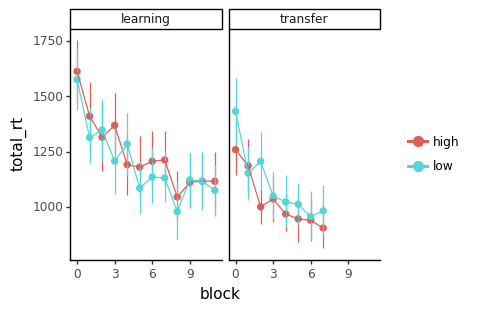

<ggplot: (110870801454)>


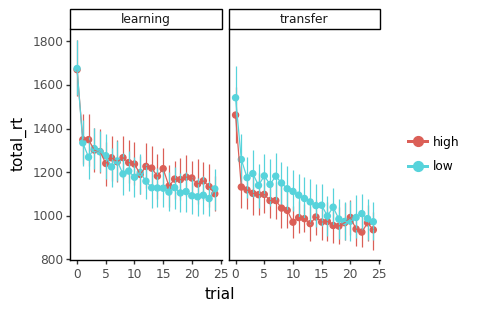

<ggplot: (110870801454)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


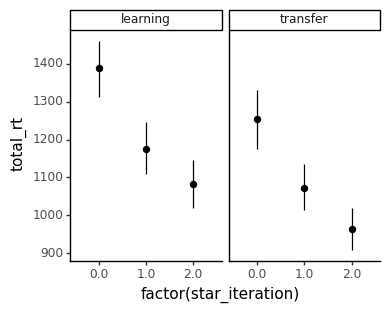

<ggplot: (110870801454)>


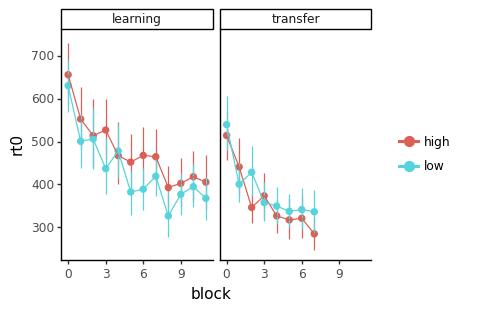

<ggplot: (110872425930)>


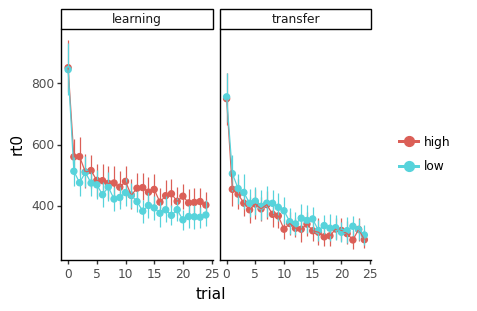

<ggplot: (110872425930)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


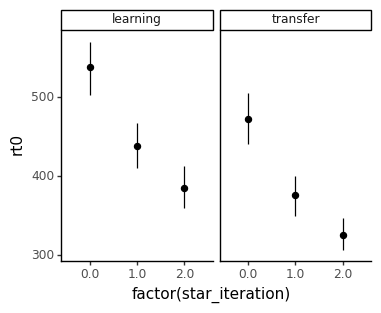

<ggplot: (110872425930)>


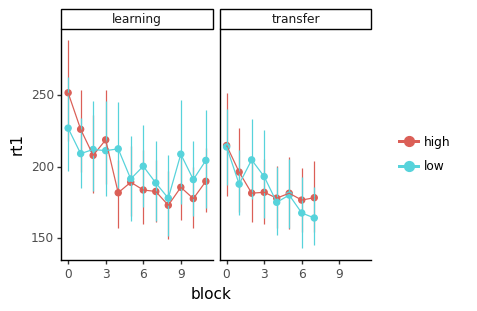

<ggplot: (110872034675)>


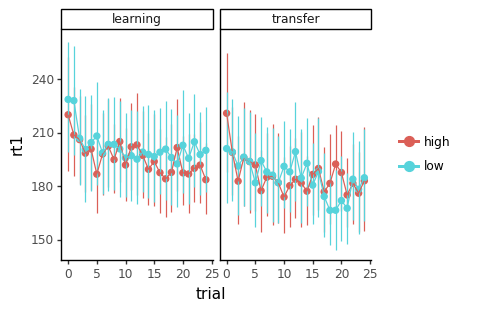

<ggplot: (110872034675)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


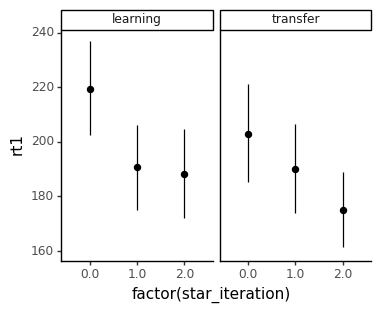

<ggplot: (110872034675)>


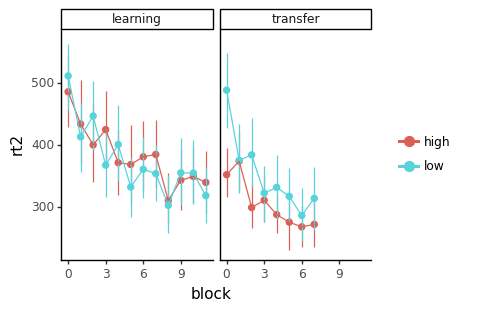

<ggplot: (110871191441)>


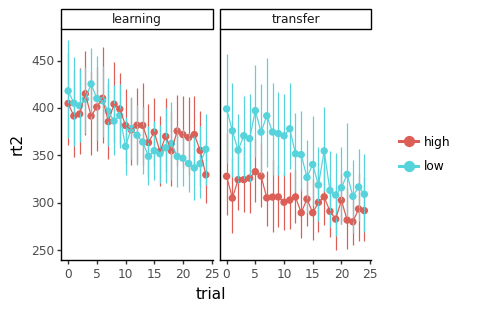

<ggplot: (110871191441)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


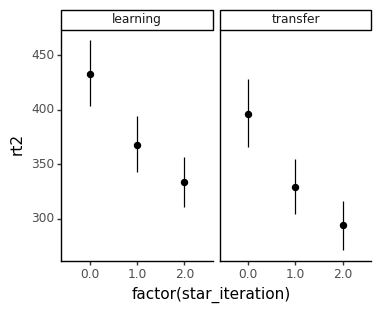

<ggplot: (110871191441)>


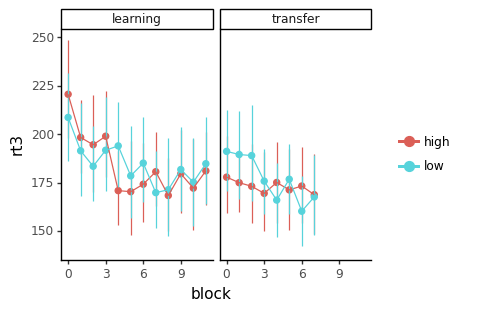

<ggplot: (110871996016)>


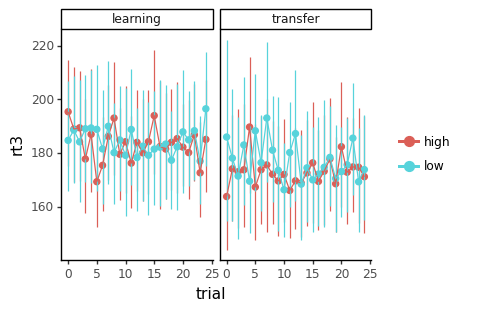

<ggplot: (110871996016)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


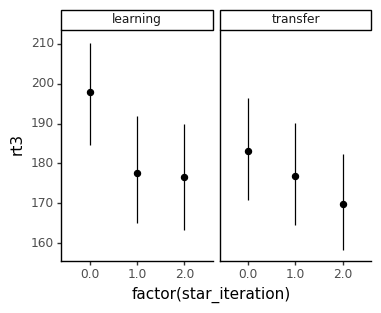

<ggplot: (110871996016)>


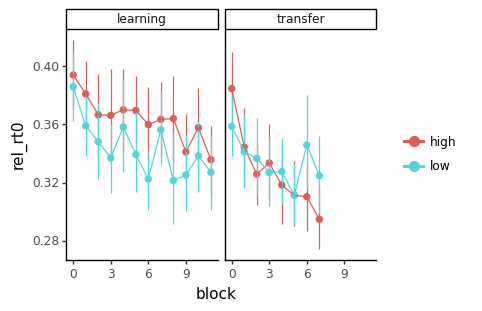

<ggplot: (110870836697)>


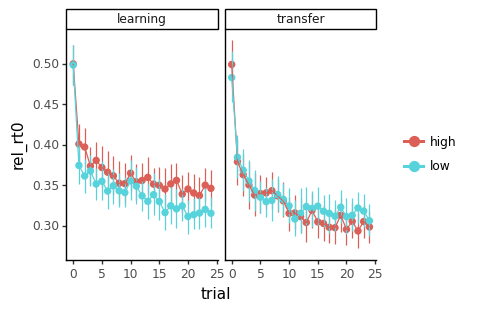

<ggplot: (110870836697)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


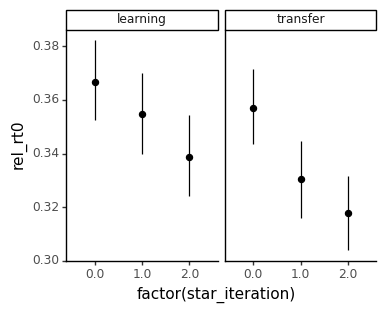

<ggplot: (110870836697)>


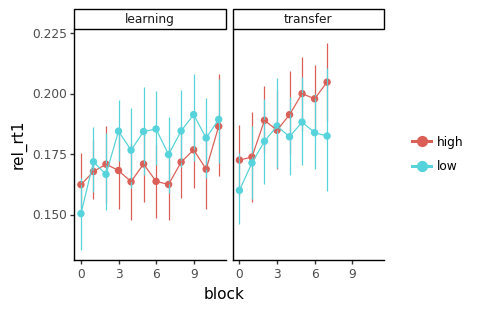

<ggplot: (110871984153)>


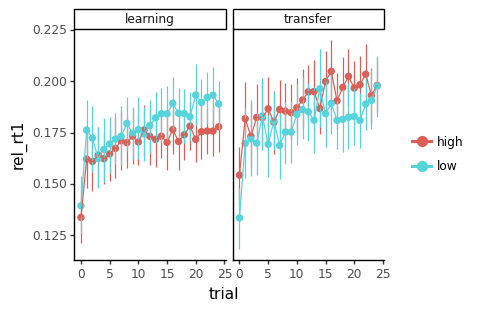

<ggplot: (110871984153)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


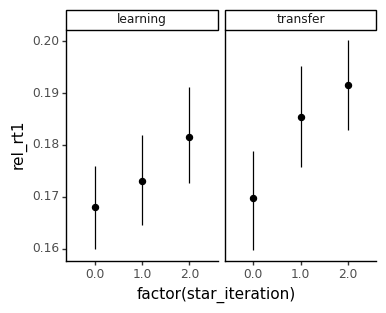

<ggplot: (110871984153)>


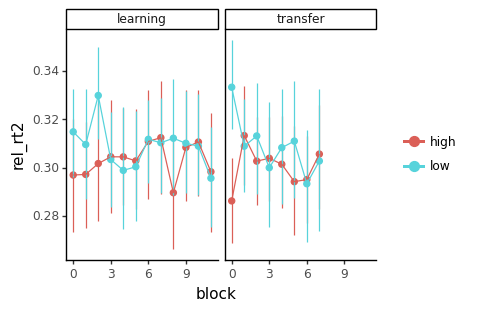

<ggplot: (110874087403)>


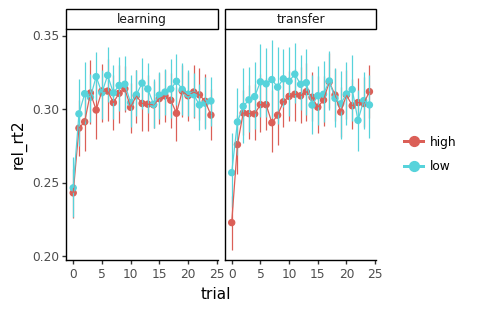

<ggplot: (110874087403)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


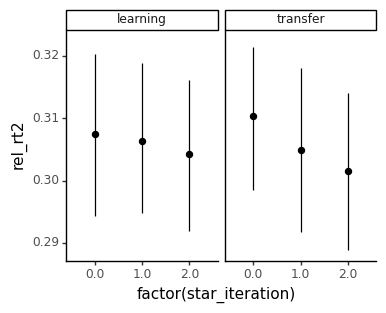

<ggplot: (110874087403)>


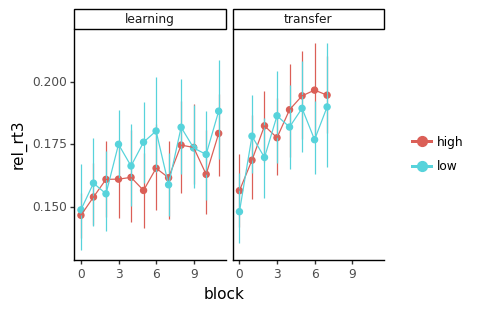

<ggplot: (110871564427)>


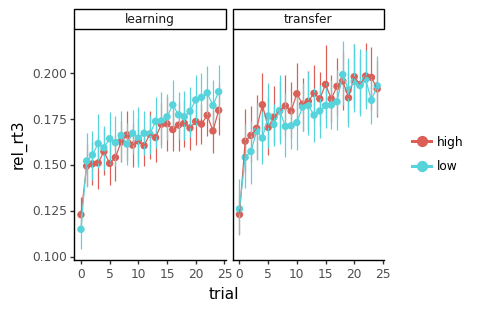

<ggplot: (110871564427)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


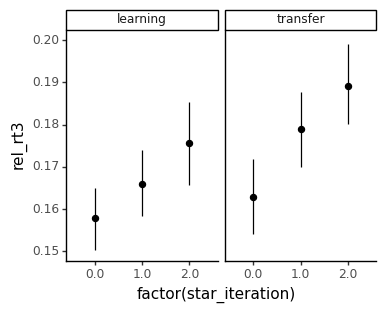

<ggplot: (110871564427)>


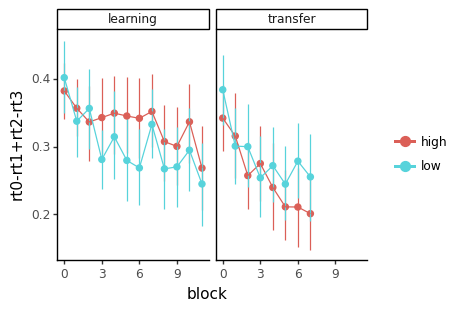

<ggplot: (110872206493)>


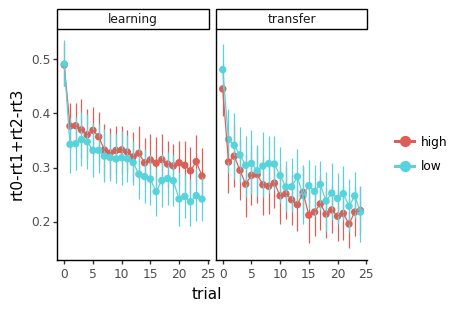

<ggplot: (110872206493)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


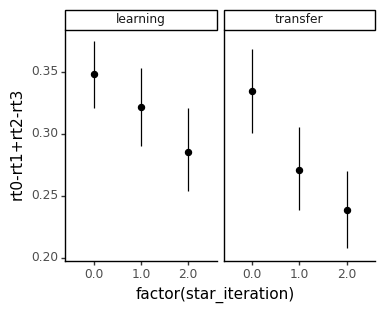

<ggplot: (110872206493)>


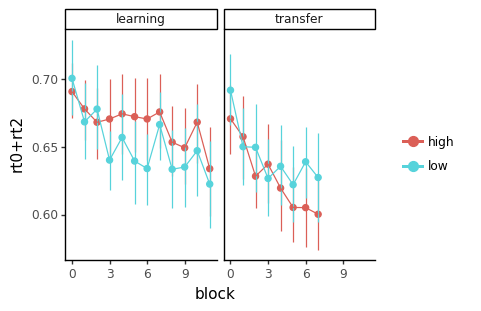

<ggplot: (110872367397)>


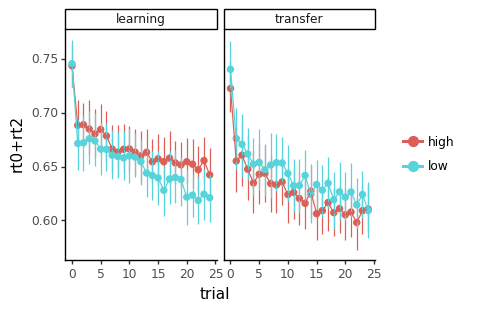

<ggplot: (110872367397)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


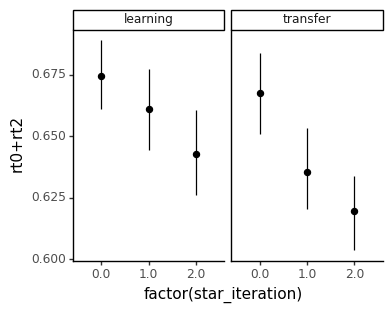

<ggplot: (110872367397)>


KeyboardInterrupt: 

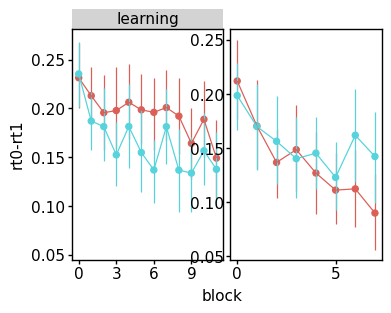

In [83]:
subj_dat_block = all_data_w.groupby(['sid', 'trial_type', 'phase', 'block']).aggregate('mean').reset_index()
subj_dat_trial = all_data_w.groupby(['sid', 'trial_type', 'phase', 'trial']).aggregate('mean').reset_index()
subj_dat_iteration = all_data_w.groupby(['sid', 'trial_type', 'phase', 'star_iteration']).aggregate('mean').reset_index()

gg.options.figure_size = (4, 3)
for y in ['total_rt'] + ['rt{}'.format(s) for s in range(4)] + ['rel_rt{}'.format(s) for s in range(4)] + ['rt0-rt1+rt2-rt3', 'rt0+rt2', 'rt0-rt1', 'rt2-rt3', 'rt2-rt0', 'rt2-rt1']:
    g = (gg.ggplot(subj_dat_block, gg.aes('block', y, color='phase'))
         + gg.stat_summary()
         + gg.stat_summary(geom='line')
         + gg.labs(color='')
         + gg.facet_grid(' ~ trial_type')
        )
    print(g)
    # g.save(os.path.join(plot_dir, '101_RtzzlowOverBlock.png'))
    
    g += gg.aes(x='trial')
    g.data = subj_dat_trial
    print(g)
    
    g += gg.aes(x='factor(star_iteration)', group='factor(star_iteration)')
    g.data = subj_dat_iteration
    print(g)

In [10]:
learn_dat = all_data.loc[(all_data['block'] > 9) & (all_data['trial_type'] == 'learning')]
trans_dat = all_data.loc[(all_data['block'] < 2) & (all_data['trial_type'] == 'transfer')]

subj_learn_dat = learn_dat.groupby(['sid', 'trial_type', 'phase']).aggregate('mean').reset_index()
subj_trans_dat = trans_dat.groupby(['sid', 'trial_type', 'phase']).aggregate('mean').reset_index()

assert(subj_learn_dat.shape==subj_trans_dat.shape)

id_cols = ['sid', 'phase']
subj_dat = pd.merge(
    subj_learn_dat[id_cols + ['rt_zz_low']],
    subj_trans_dat[id_cols + ['rt_zz_low']],
    on=id_cols, suffixes=['_learn', '_trans']
)
subj_dat['rt_zz_low_trans_minus_learn'] = subj_dat['rt_zz_low_trans'] - subj_dat['rt_zz_low_learn']
subj_dat

,sid,phase,rt_zz_low_learn,rt_zz_low_trans,rt_zz_low_trans_minus_learn
0,13885,high,0.119661,0.102978,-0.016683
1,13885,low,0.090423,0.078998,-0.011425
2,14239,high,0.111673,0.135150,0.023477
3,14239,low,0.095874,0.119835,0.023960
4,16849,high,0.080935,0.114146,0.033211
...,...,...,...,...,...
89,39304,low,0.225552,0.202057,-0.023495
90,39508,high,0.050014,0.027402,-0.022612
91,39508,low,0.022081,0.068836,0.046754
92,39520,high,0.089684,0.028702,-0.060982


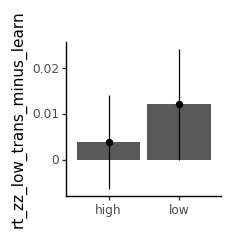

<ggplot: (110871984135)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzigzagTransMinusLearn.png


In [11]:
gg.options.figure_size = (2, 2)
g = (gg.ggplot(subj_dat, gg.aes('phase', 'rt_zz_low_trans_minus_learn'))
     + gg.stat_summary(geom='bar')
     + gg.stat_summary()
     + gg.labs(x='')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzigzagTransMinusLearn.png'))
gg.options.figure_size = (5, 5)

In [12]:
id_cols = ['sid', 'trial_type', 'block', 'phase']
interest_cols = ['rt_zz_low', 'rt_zz_high', 'acc']
dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + interest_cols]
dat2 = pd.merge(
    dat.loc[dat['phase'] == 'low'].drop(columns=['phase']),
    dat.loc[dat['phase'] == 'high'].drop(columns=['phase']),
    on=id_cols[:-1],
    suffixes=['_low', '_high']
)
dat2['rt_zzlow_low_minus_high'] = dat2['rt_zz_low_low'] - dat2['rt_zz_low_high']
dat2['rt_zzhigh_low_minus_high'] = dat2['rt_zz_high_low'] - dat2['rt_zz_high_high']
dat2

,sid,trial_type,block,rt_zz_low_low,rt_zz_high_low,acc_low,rt_zz_low_high,rt_zz_high_high,acc_high,rt_zzlow_low_minus_high,rt_zzhigh_low_minus_high
0,13885,learning,0.0,0.136533,0.069619,0.000000,0.057103,0.036790,0.00,0.079430,0.032829
1,13885,learning,1.0,0.180631,0.093929,0.040000,0.024059,0.007379,0.92,0.156572,0.086550
2,13885,learning,2.0,0.171072,0.086729,0.000000,0.065663,0.026466,0.00,0.105409,0.060263
3,13885,learning,3.0,0.028526,0.027101,0.920000,0.112554,0.069264,0.88,-0.084027,-0.042163
4,13885,learning,4.0,0.124863,0.088528,0.720000,0.127578,0.063881,0.00,-0.002715,0.024647
...,...,...,...,...,...,...,...,...,...,...,...
935,39520,transfer,3.0,-0.049949,0.014658,0.720000,0.105444,0.040772,0.00,-0.155393,-0.026115
936,39520,transfer,4.0,0.025696,-0.002665,0.640000,0.085624,0.044670,0.00,-0.059927,-0.047335
937,39520,transfer,5.0,0.095158,0.040083,0.000000,0.023355,0.022984,0.92,0.071803,0.017099
938,39520,transfer,6.0,0.014542,0.000405,0.608696,0.126401,0.062863,0.00,-0.111858,-0.062458


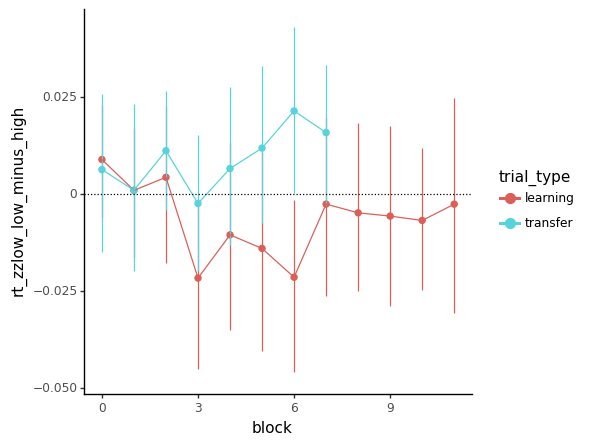

<ggplot: (110872126600)>

In [13]:
g = (gg.ggplot(dat2, gg.aes('block', 'rt_zzlow_low_minus_high', color='trial_type'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.geom_hline(yintercept=0, linetype='dotted')
    )
g

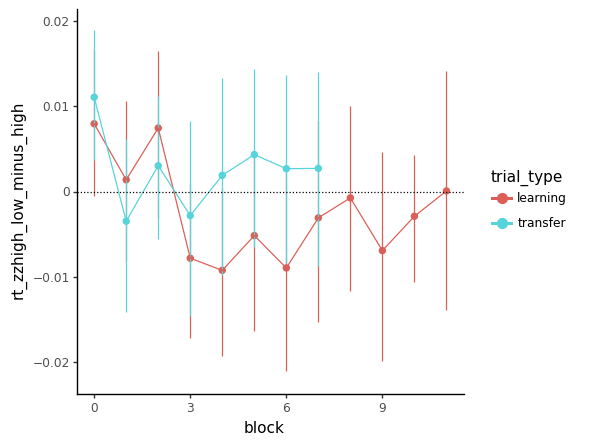

<ggplot: (110872126600)>

In [14]:
g += gg.aes(y='rt_zzhigh_low_minus_high')
g

In [15]:
id_cols = ['sid', 'trial_type', 'phase']
sum_dat = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['rt_zz_low']]
subj_dat = pd.merge(
    sum_dat.loc[sum_dat['phase'] == 'low'].drop(columns=['phase']),
    sum_dat.loc[sum_dat['phase'] == 'high'].drop(columns=['phase']),
    on=id_cols[:-1],
    suffixes=['_low', '_high']
)
subj_dat['rt_zz_low_low_minus_high'] = dat2['rt_zz_low_low'] - dat2['rt_zz_low_high']
subj_dat

,sid,trial_type,rt_zz_low_low,rt_zz_low_high,rt_zz_low_low_minus_high
0,13885,learning,0.104421,0.097218,0.079430
1,13885,transfer,0.077080,0.073245,0.156572
2,14239,learning,0.019280,0.108078,0.105409
3,14239,transfer,0.109672,0.083053,-0.084027
4,16849,learning,0.105930,0.059385,-0.002715
...,...,...,...,...,...
89,39304,transfer,0.183036,0.209124,-0.049174
90,39508,learning,0.020088,0.042831,0.044657
91,39508,transfer,0.062628,0.021224,-0.075068
92,39520,learning,0.053894,0.072640,-0.071915


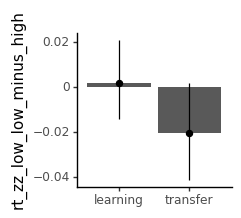

<ggplot: (110871445173)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 2 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzigzagLowMinusHigh.png


In [16]:
gg.options.figure_size = (2, 2)
g = (gg.ggplot(subj_dat, gg.aes('trial_type', 'rt_zz_low_low_minus_high'))
     + gg.stat_summary(geom='bar')
     + gg.stat_summary()
     + gg.labs(x='')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzigzagLowMinusHigh.png'))
gg.options.figure_size = (5, 5)

In [ ]:
# subj_dat = all_data.groupby(['sid', 'subtrial', 'trial_type', 'phase', 'star_iteration']).aggregate('mean').reset_index()
# g = (gg.ggplot(subj_dat, gg.aes('star_iteration', 'rt_zz_low', color='phase'))
#      + gg.stat_summary()
#      + gg.stat_summary(geom='line')
#      + gg.facet_grid(' ~ trial_type')
#     )
# g

In [ ]:
# g += gg.aes(y='rt_zz_high')
# g

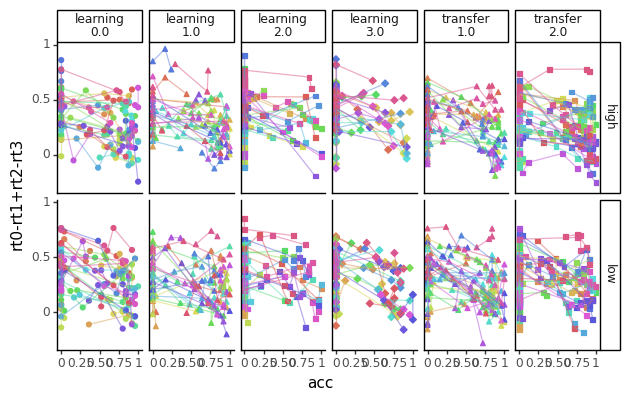

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 7 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzlowOverAcc.png


<ggplot: (110870975723)>


In [87]:
subj_dat = all_data_w.groupby(['sid', 'trial_type', 'phase', 'block', 'goal_star']).aggregate('mean').reset_index()

gg.options.figure_size = (7, 4)
g = (gg.ggplot(subj_dat, gg.aes('acc', 'rt0-rt1+rt2-rt3', color='factor(sid)', shape='factor(goal_star)'))
     + gg.geom_point()
     + gg.geom_line(alpha=0.5)
#      + gg.geom_smooth(gg.aes(group=1))
     + gg.theme(legend_position='none')
     + gg.facet_grid('phase ~ trial_type + goal_star')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzzlowOverAcc.png'))

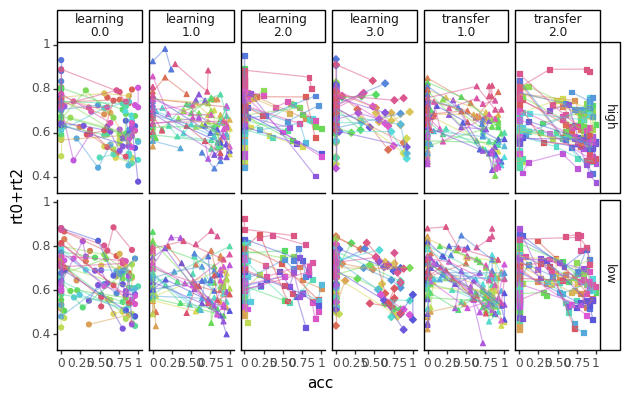

<ggplot: (110870975723)>


In [89]:
g += gg.aes(y='rt0+rt2')
print(g)
g.save(os.path.join(plot_dir, '101_RtzzhighOverAcc.png'))

In [88]:
# subj_dat = all_data.groupby(['sid', 'subtrial', 'trial_type', 'phase', 'block', 'goal_star']).aggregate('mean').reset_index()
# gg.options.figure_size = (7, 4)
# g = (gg.ggplot(subj_dat, gg.aes('acc', 'rt_zz_low', color='factor(sid)', shape='factor(goal_star)'))
#      + gg.geom_point()
#      + gg.geom_line(alpha=0.5)
# #      + gg.geom_smooth(gg.aes(group=1))
#      + gg.theme(legend_position='none')
#      + gg.facet_grid('phase ~ trial_type + goal_star')
#     )
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzzlowOverAcc.png'))

In [90]:
# g += gg.aes(y='rt_zz_high')
# print(g)
# g.save(os.path.join(plot_dir, '101_RtzzhighOverAcc.png'))

# When do 2-key sequences get activated?

In [21]:
all_data['middle_item_bool'] = all_data['middle_item'] != -1
all_data['star_bool'] = all_data['unlocked_star'] != -1

id_cols = ['sid', 'phase', 'trial_type', 'block', 'trial']
interest_cols = ['middle_item_bool', 'rt_zz_low', 'rt_zz_high', 'rt', 'log_rt']
sum_dat = all_data.loc[all_data['subtrial'].isin([1, 3])].groupby(id_cols).aggregate('sum').reset_index()[id_cols + interest_cols]
sum_dat

,sid,phase,trial_type,block,trial,middle_item_bool,rt_zz_low,rt_zz_high,rt,log_rt
0,13885,high,learning,0.0,0.0,1,0.135257,0.053800,931.025,12.110852
1,13885,high,learning,0.0,1.0,0,0.125216,0.040393,538.400,11.186452
2,13885,high,learning,0.0,2.0,1,-0.150903,0.023993,629.455,11.500572
3,13885,high,learning,0.0,3.0,0,0.034105,-0.017673,759.105,11.802705
4,13885,high,learning,0.0,4.0,0,0.047873,0.070086,495.515,11.016451
...,...,...,...,...,...,...,...,...,...,...
46564,39520,low,transfer,7.0,20.0,2,-0.022354,0.025709,242.255,9.443038
46565,39520,low,transfer,7.0,21.0,2,-0.003971,-0.006079,239.705,9.570663
46566,39520,low,transfer,7.0,22.0,2,-0.036807,0.033326,266.280,9.706197
46567,39520,low,transfer,7.0,23.0,2,-0.023155,0.034514,261.950,9.509509


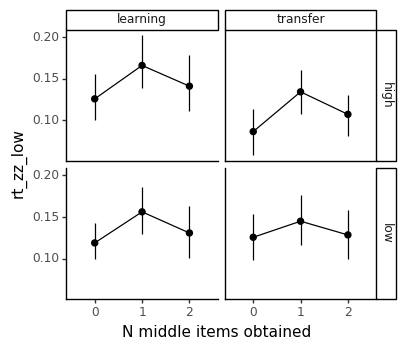

<ggplot: (110871078533)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 4 x 3.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzigzagOverItemSuccess.png


In [22]:
subj_dat = sum_dat.groupby(['sid', 'phase', 'trial_type', 'middle_item_bool']).aggregate('mean').reset_index()

gg.options.figure_size = (4, 3.5)
g = (gg.ggplot(subj_dat, gg.aes('factor(middle_item_bool)', 'rt_zz_low', group=1))
#      + gg.geom_point(position=gg.position_dodge(width=0.3))
#      + gg.geom_line(position=gg.position_dodge(width=0.3), linetype='dotted')
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(x='N middle items obtained')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzigzagOverItemSuccess.png'))

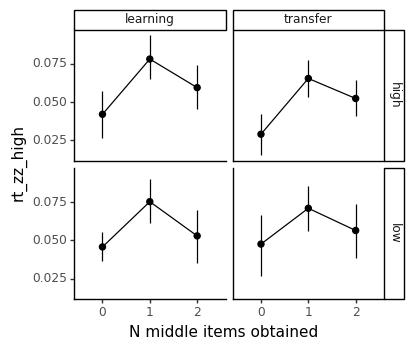

<ggplot: (110871078533)>

In [23]:
g += gg.aes(y='rt_zz_high')
g

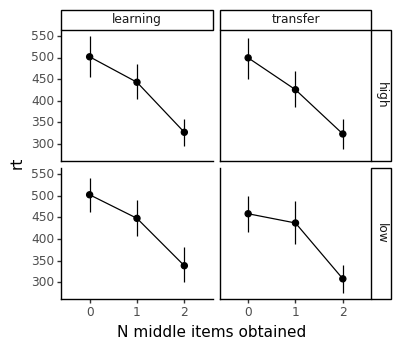

<ggplot: (110871078533)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 4 x 3.5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtsOverItemSuccess.png


In [24]:
g += gg.aes(y='rt')
print(g)
g.save(os.path.join(plot_dir, '101_RtsOverItemSuccess.png'))
gg.options.figure_size = (5, 5)

## Effect of intermediate item on RTs

In [25]:
# Get trials with middle item at position 1, and with no item at position 1
all_data['bool_middle_item'] = np.invert(np.isnan(all_data['middle_item'])) * (all_data['middle_item'] != -1)

got_middle_sub_dat = all_data.loc[(all_data['bool_middle_item']) & (all_data['subtrial'] == 1)]
got_middle_idxs = got_middle_sub_dat[['sid', 'phase', 'trial_type', 'block', 'trial']]

no_middle_sub_dat = all_data.loc[np.invert(all_data['bool_middle_item']) & (all_data['subtrial'] == 1)]
no_middle_idxs = no_middle_sub_dat[['sid', 'phase', 'trial_type', 'block', 'trial']]

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\pandas\core\computation\expressions.py:200: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead


In [26]:
# Create column that says whether each trial had an item in position 1 or not (`got_middle`)
got_middle = pd.merge(got_middle_idxs, all_data, how='left')
no_middle = pd.merge(no_middle_idxs, all_data, how='left')

assert np.round(got_middle.shape[0] / got_middle_idxs.shape[0]) == 4
assert np.round(no_middle.shape[0] / no_middle_idxs.shape[0]) == 4

got_middle['got_middle_item'] = True
no_middle['got_middle_item'] = False

mid_data = pd.concat([got_middle, no_middle])
mid_data

,sid,phase,trial_type,block,trial,rt,stimulus,key_press,trial_index,time_elapsed,...,rt_zz_high,bool_middle_item,chance_performer,inattentives,psych_disorder,head_trauma,pen_paper,middle_item_bool,star_bool,got_middle_item
0,13885,high,learning,0.0,0.0,797.865,0,85.0,297,2422963,...,0.026900,False,False,False,False,False,False,True,True,True
1,13885,high,learning,0.0,0.0,654.720,0,73.0,298,2423619,...,0.026900,True,False,False,False,False,False,True,True,True
2,13885,high,learning,0.0,0.0,1317.900,0,79.0,299,2424938,...,0.026900,False,False,False,False,False,False,True,True,True
3,13885,high,learning,0.0,0.0,276.305,0,80.0,300,2425216,...,0.026900,False,False,False,False,False,False,False,False,True
4,13885,high,learning,0.0,5.0,204.555,0,85.0,322,2433706,...,0.084285,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,39520,low,transfer,6.0,20.0,343.180,0,80.0,5174,1934008,...,0.086216,False,False,False,False,False,False,False,False,False
49034,39520,low,transfer,7.0,7.0,59.105,0,80.0,5232,1967510,...,0.071697,False,False,False,False,False,False,True,True,False
49035,39520,low,transfer,7.0,7.0,133.585,0,73.0,5233,1967650,...,0.071697,False,False,False,False,False,False,False,True,False
49036,39520,low,transfer,7.0,7.0,547.875,0,79.0,5234,1968205,...,0.071697,False,False,False,False,False,False,True,True,False


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.


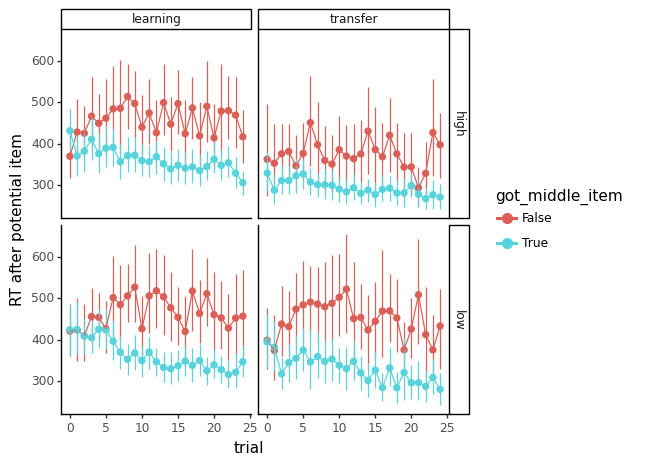

<ggplot: (110871063137)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_item3RtsOverTrial.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 2 rows containing non-finite values.


In [27]:
subj_dat = mid_data.loc[mid_data['subtrial'] == 2].groupby(['sid', 'trial_type', 'phase', 'trial', 'got_middle_item']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 5)
g = (gg.ggplot(subj_dat, gg.aes('trial', 'rt', color='got_middle_item'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.labs(y='RT after potential item')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_item3RtsOverTrial.png'))

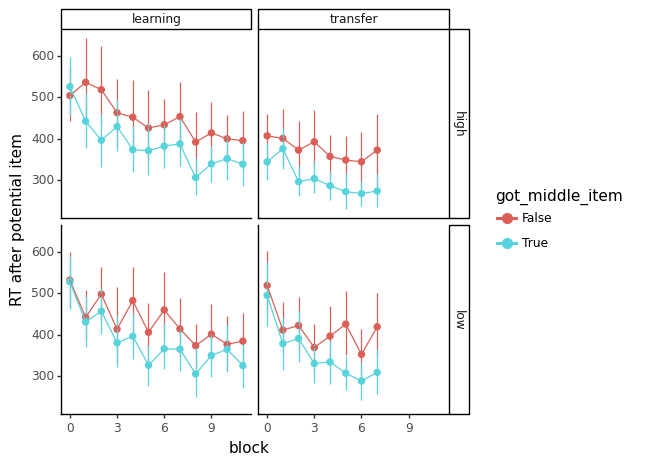

<ggplot: (110871063137)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_item3RtsOverBlock.png


In [28]:
subj_dat = mid_data.loc[mid_data['subtrial'] == 2].groupby(['sid', 'trial_type', 'phase', 'block', 'got_middle_item']).aggregate('mean').reset_index()

g += gg.aes(x='block')
g.data = subj_dat
print(g)
g.save(os.path.join(plot_dir, '101_item3RtsOverBlock.png'))

## RT zigzag 4-item stars vs 3-item stars

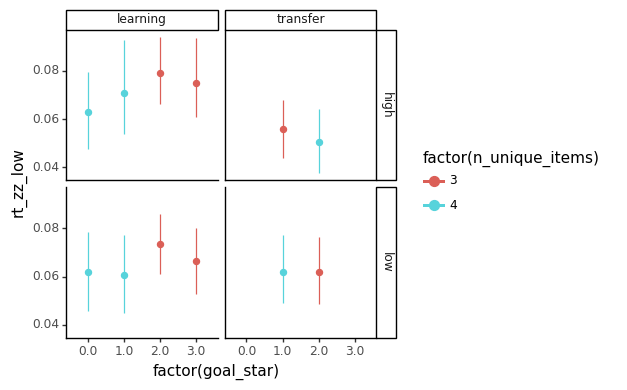

<ggplot: (110871468975)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 4 x 4 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_rtzzlowOverStar.png


In [29]:
all_data['n_unique_items'] = get_n_unique_items(all_data)
subj_dat = all_data.groupby(['sid', 'goal_star', 'phase', 'trial_type']).aggregate('mean').reset_index()

gg.options.figure_size = (4, 4)
g = (gg.ggplot(subj_dat, gg.aes('factor(goal_star)', 'rt_zz_low', color='factor(n_unique_items)'))
     + gg.stat_summary()
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_rtzzlowOverStar.png'))

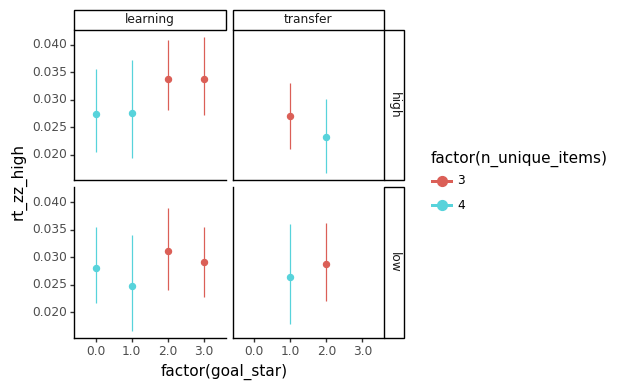

<ggplot: (110871468975)>


In [30]:
g += gg.aes(y='rt_zz_high')
print(g)

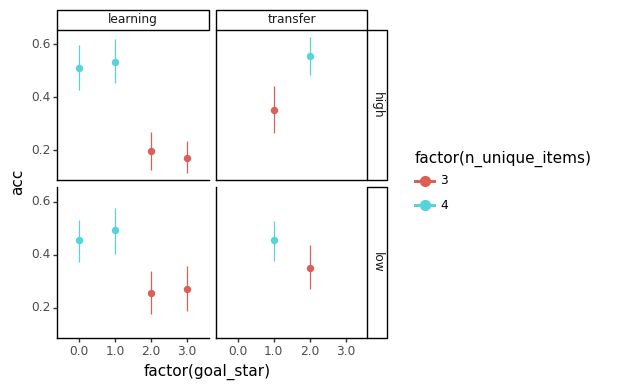

<ggplot: (110871468975)>


In [31]:
g += gg.aes(y='acc')
print(g)

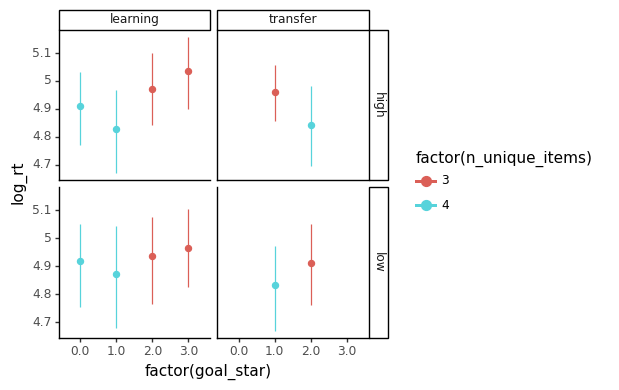

<ggplot: (110871468975)>


In [32]:
g += gg.aes(y='log_rt')
print(g)

## RT patterns for correct vs incorrect items and stars

<ipython-input-33-c356787983ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-33-c356787983ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.


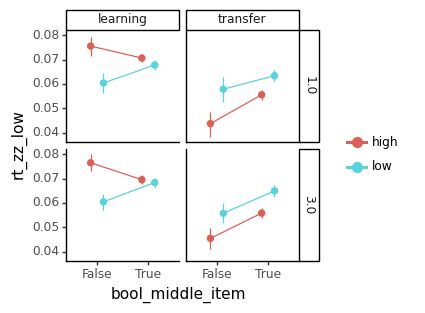

<ggplot: (110871023824)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzlowOverItemAchieved.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.


In [33]:
subj_dat = all_data.loc[(all_data['subtrial'].isin([1, 3]))]
subj_dat['bool_middle_item'] = np.invert(np.isnan(subj_dat['middle_item'])) & (subj_dat['middle_item'] != -1)
subj_dat['bool_unlocked_star'] = np.invert(np.isnan(subj_dat['unlocked_star'])) & (subj_dat['unlocked_star'] != -1)

gg.options.figure_size = (3, 3)
g = (gg.ggplot(subj_dat, gg.aes('bool_middle_item', 'rt_zz_low', color='phase', group='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.5))
     + gg.stat_summary(position=gg.position_dodge(width=0.5), geom='line')
     + gg.labs(color='')
     + gg.facet_grid('subtrial ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '101_RtzzlowOverItemAchieved.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.


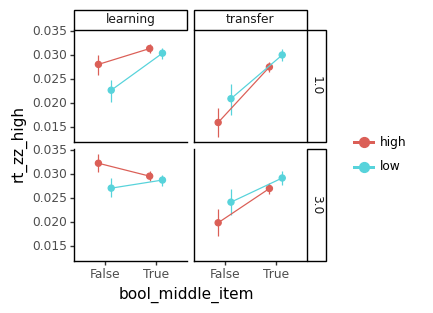

<ggplot: (110871023824)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzhighOverItemAchieved.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 129 rows containing non-finite values.


In [34]:
g += gg.aes(y='rt_zz_high')
print(g)
g.save(os.path.join(plot_dir, '101_RtzzhighOverItemAchieved.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 36 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 36 rows containing non-finite values.


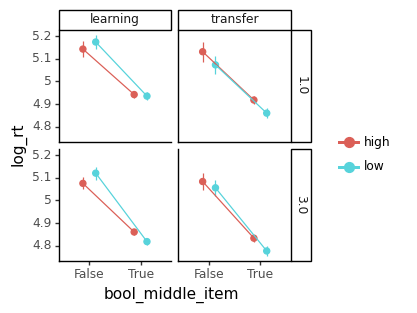

<ggplot: (110871023824)>


In [35]:
g += gg.aes(y='log_rt')
print(g)

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.


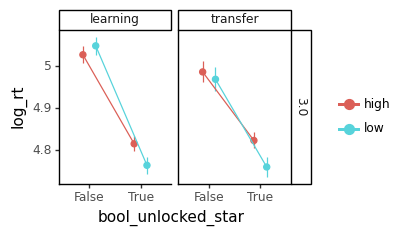

<ggplot: (110871023824)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzhighOverStarAchieved.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.


In [36]:
gg.options.figure_size = (3, 2)
g += gg.aes(x='bool_unlocked_star')
g.data = g.data.loc[g.data['subtrial'] == 3]
print(g)
g.save(os.path.join(plot_dir, '101_RtzzhighOverStarAchieved.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.


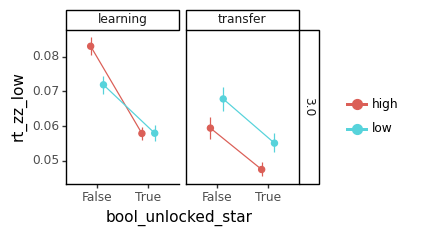

<ggplot: (110871023824)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 3 x 2 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\101_RtzzlowOverStarAchieved.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.


In [37]:
g += gg.aes(y='rt_zz_low')
print(g)
g.save(os.path.join(plot_dir, '101_RtzzlowOverStarAchieved.png'))

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 18 rows containing non-finite values.


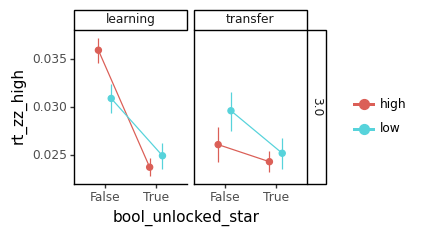

<ggplot: (110871023824)>


In [38]:
g += gg.aes(y='rt_zz_high')
print(g)